In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split

In [5]:
def get_dataset(pathX, pathY):
    df_x =  pd.read_pickle(pathX).to_numpy()
    df_y =  pd.read_pickle(pathY).to_numpy()
    return df_x, df_y

df_x, df_y  =  get_dataset('../data/processed/mean_ACE.pkl','../data/processed/ACE_Y_mean.pkl')


((22300, 11), (22300,))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    df_x, df_y, test_size=0.3, random_state=13
)

In [26]:
params = {
    "n_estimators": 800,
    "max_depth": 30,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}

In [27]:
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, max_depth=30, min_samples_split=5,
                          n_estimators=800)

In [30]:
def adjusted_r2_score(y_true, y_pred, n_features):
    r2 = r2_score(y_true, y_pred)
    n_samples = len(y_true)
    adjusted_r2 = 1 - (1 - r2) * (n_samples - 1) / (n_samples - n_features )
    return adjusted_r2

mse = mean_squared_error(y_test, reg.predict(X_test),squared=False)
mae  = mean_absolute_error(y_test, reg.predict(X_test))
r2 =  r2_score(y_test,reg.predict(X_test))
adr2 =  adjusted_r2_score(y_test, reg.predict(X_test),11)
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
print("R2 on test set: {:.4f}".format(r2))
print("MAE",mae)
print("adjusted R2", adr2)

The mean squared error (MSE) on test set: 1.7440
R2 on test set: 0.9799
MAE 0.5058871895109608
adjusted R2 0.979886381418002


In [ ]:

def test(net,test_loader,device,logger):
    y_pred = []
    y_true = []
    net.train(False)
    net.eval()
    for inputs, targets in test_loader:
        inputs, targets = inputs.to(device), targets
        y_pred.extend(net(inputs).cpu().data.numpy())
        y_true.extend(targets.numpy())

    print("MAE:", mean_absolute_error(y_true, y_pred))
    print("RMSE:", mean_squared_error(y_true, y_pred,squared=False))
    print("R^2:", r2_score(y_true, y_pred))


In [35]:
rf = ensemble.RandomForestRegressor(n_estimators=800,max_depth=25)
rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=25, n_estimators=800)

In [50]:
def adjusted_r2_score(y_true, y_pred, n_features):
    r2 = r2_score(y_true, y_pred)
    n_samples = len(y_true)
    adjusted_r2 = 1 - (1 - r2) * (n_samples - 1) / (n_samples - n_features )
    return adjusted_r2

mse = mean_squared_error(y_test, rf.predict(X_test),squared=False)
mae  = mean_absolute_error(y_test, rf.predict(X_test))
r2 =  r2_score(y_test,rf.predict(X_test))
adr2 =  adjusted_r2_score(y_test, rf.predict(X_test),11)
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
print("R2 on test set: {:.4f}".format(r2))
print("MAE",mae)
print("adjusted R2", adr2)

The mean squared error (MSE) on test set: 1.3101
R2 on test set: 0.9887
MAE 0.498198253335383
adjusted R2 0.9886485157176017


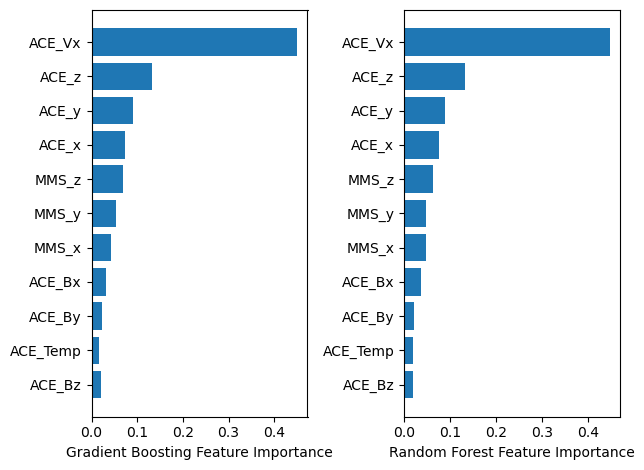

In [49]:
sorted_idx = rf.feature_importances_.argsort()
columns=['ACE_Bx','ACE_By','ACE_Bz','ACE_x','ACE_y','ACE_z','ACE_Vx','ACE_Temp','MMS_x','MMS_y','MMS_z']
plt.subplot(1,2,1)
plt.barh(np.array(columns)[sorted_idx.astype(int)], reg.feature_importances_[sorted_idx])
plt.xlabel("Gradient Boosting Feature Importance")
plt.subplot(1,2,2)
plt.barh(np.array(columns)[sorted_idx.astype(int)], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.tight_layout()